In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.offline as py
# py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
# warnings.filterwarnings('ignore') #ignore warning messages

In [2]:
df = pd.read_excel("TrainDataset2023.xls")
df.tail()

ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
395  TRG002948              0                      54.500000  58.5   1    0   
396  TRG002954              0                      49.250000  34.3   0    0   
397  TRG002958              0                      48.500000  53.3   0    0   
398  TRG002961              0                      47.500000  68.8   1    0   
399  TRG002962              0                      46.916667  46.0   1    0   

     HER2  TrippleNegative  ChemoGrade  Proliferation  ...  \
395     1                0           3              2  ...   
396     0                1           3              3  ...   
397     0                1           2              1  ...   
398     0                0           3              3  ...   
399     0                0           2              1  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
395                                       0.476493   
396                                       0.418382   
397                                       0.527779   
398                                       0.313693   
399                                       0.670229   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
395                                      0.476493                    2.453583   
396                                      0.418382                    2.995603   
397                                      0.527778                    1.500000   
398                                      0.313693                    3.573557   
399                                      0.670229                    1.857045   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
395                       0.003229                 2.327038e+06   
396                       0.004243                 1.005061e+06   
397                       0.003728                 2.132007e+05   
398                       0.001112                 2.008034e+07   
399                       0.006706                 5.609262e+05   

     original_ngtdm_Busyness  original_ngtdm_Coarseness  \
395                18.562377                   0.013766   
396               156.627179                   0.002228   
397                 0.996746                   0.252582   
398               204.864200                   0.001372   
399                 9.609163                   0.026591   

     original_ngtdm_Complexity  original_ngtdm_Contrast  \
395                   0.018042                 0.000288   
396                   0.136015                 0.022148   
397                   0.007380                 0.000037   
398                   0.054063                 0.003697   
399                   0.018682                 0.000311   

     original_ngtdm_Strength  
395                 0.012257  
396                 0.002098  
397                 0.231059  
398                 0.001368  
399                 0.022676  

[5 rows x 120 columns]

In [3]:
df.shape

(400, 120)

In [4]:
df.iloc[:,0:3].describe()

pCR (outcome)  RelapseFreeSurvival (outcome)
count     400.000000                     400.000000
mean       12.697500                      56.000208
std       111.107417                      27.137584
min         0.000000                       0.000000
25%         0.000000                      38.000000
50%         0.000000                      55.000000
75%         0.000000                      73.000000
max       999.000000                     144.000000

In [5]:
# replace the 999 values with None, to make it easier for data imputation.
df=df.replace(999, None)

In [6]:
df.columns

Index(['ID', 'pCR (outcome)', 'RelapseFreeSurvival (outcome)', 'Age', 'ER',
       'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=120)

In [7]:
# the ID column is not needed.
Df_ = df.iloc[:,1:13]

In [8]:
Df_

pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER PgR HER2  \
0               1                     144.000000  41.0   0   0    0   
1               0                     142.000000  39.0   1   1    0   
2               1                     135.000000  31.0   0   0    0   
3               0                      12.000000  35.0   0   0    0   
4               0                     109.000000  61.0   1   0    0   
..            ...                            ...   ...  ..  ..  ...   
395             0                      54.500000  58.5   1   0    1   
396             0                      49.250000  34.3   0   0    0   
397             0                      48.500000  53.3   0   0    0   
398             0                      47.500000  68.8   1   0    0   
399             0                      46.916667  46.0   1   0    0   

    TrippleNegative ChemoGrade Proliferation HistologyType LNStatus  \
0                 1          3             3             1        1   
1                 0          3             3             1        1   
2                 1          2             1             1        0   
3                 1          3             3             1        1   
4                 0          2             1             1        0   
..              ...        ...           ...           ...      ...   
395               0          3             2             1        1   
396               1          3             3             1        0   
397               1          2             1             1        0   
398               0          3             3             1        1   
399               0          2             1             1        1   

     TumourStage  
0              2  
1              2  
2              2  
3              3  
4              2  
..           ...  
395            4  
396            2  
397            2  
398            3  
399            2  

[400 rows x 12 columns]

In [9]:
# the first 12 columns have missing values. Vizualizing them.

null_feat = pd.DataFrame(len(Df_['pCR (outcome)']) - Df_.isnull().sum(), columns = ['Count'])
print(null_feat)
trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values in first 12 columns")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

                               Count
pCR (outcome)                    395
RelapseFreeSurvival (outcome)    400
Age                              400
ER                               400
PgR                              399
HER2                             399
TrippleNegative                  399
ChemoGrade                       397
Proliferation                    398
HistologyType                    397
LNStatus                         399
TumourStage                      400


In [10]:
# Data imputation using mode

columns = Df_.columns
for col in Df_.columns:
    Df_[col].fillna(Df_[col].mode()[0], inplace=True)
    

In [11]:
# vizualizing null values for the first 12 columns after imputation

null_feat = pd.DataFrame(len(Df_['pCR (outcome)']) - Df_.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "After treating missing values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [12]:
Df_.describe()

pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean        0.210000                      56.000208   51.804674    0.547500   
std         0.407818                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max         1.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.000000       400.000000  400.000000     400.000000   
mean     0.405000    0.300000         0.332500    2.397500       1.572500   
std      0.491507    0.458831         0.471699    0.500119       0.765643   
min      0.000000    0.000000         0.000000    1.000000       1.000000   
25%      0.000000    0.000000         0.000000    2.000000       1.000000   
50%      0.000000    0.000000         0.000000    2.000000       1.000000   
75%      1.000000    1.000000         1.000000    3.000000       2.000000   
max      1.000000    1.000000         1.000000    3.000000       3.000000   

       HistologyType    LNStatus  TumourStage  
count     400.000000  400.000000   400.000000  
mean        1.147500    0.535000     2.607500  
std         0.355048    0.499398     0.897473  
min         1.000000    0.000000     1.000000  
25%         1.000000    0.000000     2.000000  
50%         1.000000    1.000000     2.000000  
75%         1.000000    1.000000     3.000000  
max         2.000000    1.000000     4.000000

In [13]:
# data after handling missing values

Df_imputed = pd.concat((Df_, df.iloc[:,13:]), axis=1)

In [14]:
Df_imputed.describe()

pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean        0.210000                      56.000208   51.804674    0.547500   
std         0.407818                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max         1.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.000000       400.000000  400.000000     400.000000   
mean     0.405000    0.300000         0.332500    2.397500       1.572500   
std      0.491507    0.458831         0.471699    0.500119       0.765643   
min      0.000000    0.000000         0.000000    1.000000       1.000000   
25%      0.000000    0.000000         0.000000    2.000000       1.000000   
50%      0.000000    0.000000         0.000000    2.000000       1.000000   
75%      1.000000    1.000000         1.000000    3.000000       2.000000   
max      1.000000    1.000000         1.000000    3.000000       3.000000   

       HistologyType  ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count     400.000000  ...                                   4.000000e+02   
mean        1.147500  ...                                   3.957637e-01   
std         0.355048  ...                                   1.666319e-01   
min         1.000000  ...                                   7.050000e-11   
25%         1.000000  ...                                   3.199017e-01   
50%         1.000000  ...                                   4.095627e-01   
75%         1.000000  ...                                   5.000049e-01   
max         2.000000  ...                                   8.773779e-01   

       original_glszm_SmallAreaLowGrayLevelEmphasis  \
count                                  4.000000e+02   
mean                                   3.911005e-01   
std                                    1.615922e-01   
min                                    7.050000e-11   
25%                                    3.184398e-01   
50%                                    4.054695e-01   
75%                                    4.956920e-01   
max                                    8.571429e-01   

       original_glszm_ZoneEntropy  original_glszm_ZonePercentage  \
count                4.000000e+02                     400.000000   
mean                 2.722189e+00                       0.003347   
std                  7.648849e-01                       0.002419   
min                 -3.200000e-16                       0.000008   
25%                  2.340783e+00                       0.001389   
50%                  2.814884e+00                       0.002944   
75%                  3.304411e+00                       0.004798   
max                  4.947427e+00                       0.011301   

       original_glszm_ZoneVariance  original_ngtdm_Busyness  \
count                 4.000000e+02               400.000000   
mean                  5.679717e+07               178.311246   
std                   7.063846e+08              1045.453432   
min                   0.000000e+00                 0.000000   
25%                   1.030473e+06                18.760570   
50%                   3.277334e+06                67.929659   
75%                   9.079686e+06               157.370294   
max                   1.390001e+10             20764.693790   

       original_ngtdm_Coarseness  original_ngtdm_Complexity  \
count                 400.000000                 400.000000   
mean                32500.032620                   0.056935   
std                177545.921568                  

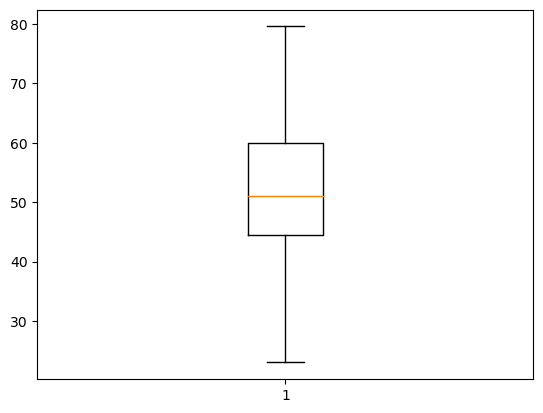

In [15]:
# Age is the only continuous feature in the clinical features, drawing a boxplot reveals that it has no outliers

plt.boxplot(Df_imputed['Age'])
plt.show()

In [16]:
#drop RFS column which is not needed for classification

Df_imputed = Df_imputed.drop("RelapseFreeSurvival (outcome)", axis = 1)

### PCA

**Here are the steps followed for performing PCA:**

1. Perform one-hot encoding to transform categorical data set to numerical data set
2. Perform training / test split of the dataset
3. Standardize the training and test data set
4. Construct covariance matrix of the training data set
5. Construct eigendecomposition of the covariance matrix
6. Select the most important features using explained variance
7. Construct project matrix; In the code below, the projection matrix is created using the five eigenvectors that correspond to the top five eigenvalues (largest), to capture about 75% of the variance in this dataset
8. Transform the training data set into new feature subspace

In [17]:
# only column 11 onwards taken for pca (MRI features)

Df_forPCA = Df_imputed.iloc[:,11:]

In [18]:
X_forPCA = Df_forPCA
Y_forPCA = Df_imputed[["pCR (outcome)"]]

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [20]:
# calcualting the explained variance gives us an idea of how many components to select after PCA
#To make a PCA, normalize data is essential

X_pca = X_forPCA.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, Y_forPCA).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(Y_forPCA, left_index = True, right_index = True, how = 'left')
pca_std['pCR (outcome)'] = pca_std['pCR (outcome)'].replace({1:'cancer',0:'no cancer'})



In [21]:
# Explained_variance

var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca[0:6].values.sum()

0.8185716214347369

In [22]:
# Pie chart to vizualize contribution of each component

labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6','COMP7','COMP8','COMP9','COMP10','COMP11to180']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'pink', 'cyan', 'canary', 'copper', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [23]:
# we will take the first 6 components as they are responsible for 0.81 of the variance.
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_forPCA)


In [24]:
# Perform PCA
pca = PCA(n_components=6)  # Reduce to 6 principal components

Y_pca = pd.DataFrame(Y_forPCA)
X_pca = pca.fit_transform(X_std)

In [25]:
sum(pca.explained_variance_ratio_)

0.8185716214347369

In [26]:
X_pca = pd.DataFrame(X_pca)
Df_afterPCA = Df_imputed.iloc[:,0:11].merge(X_pca, left_index = True, right_index = True, how = 'right')
Df_afterPCA

pCR (outcome)   Age  ER  PgR  HER2  TrippleNegative  ChemoGrade   
0                1  41.0   0    0     0                1           3  \
1                0  39.0   1    1     0                0           3   
2                1  31.0   0    0     0                1           2   
3                0  35.0   0    0     0                1           3   
4                0  61.0   1    0     0                0           2   
..             ...   ...  ..  ...   ...              ...         ...   
395              0  58.5   1    0     1                0           3   
396              0  34.3   0    0     0                1           3   
397              0  53.3   0    0     0                1           2   
398              0  68.8   1    0     0                0           3   
399              0  46.0   1    0     0                0           2   

     Proliferation  HistologyType  LNStatus  TumourStage          0         1   
0                3              1         1            2  12.596187  1.476490  \
1                3              1         1            2  -3.402929 -1.950037   
2                1              1         0            2  -3.831085 -2.983421   
3                3              1         1            3  -6.312342 -1.559572   
4                1              1         0            2  -2.275703 -3.647228   
..             ...            ...       ...          ...        ...       ...   
395              2              1         1            4  -4.421618 -3.627292   
396              3              1         0            2  10.765770  1.886069   
397              1              1         0            2  -2.991509 -5.684329   
398              3              1         1            3   0.371324  0.799043   
399              1              1         1            2  -2.744353 -4.132731   

            2         3         4         5  
0    0.835322  3.572652  3.680844  1.588340  
1   -1.825297  1.893426 -1.392585  0.782602  
2   -2.157645  2.095281 -0.686464  2.161302  
3   -1.819064  2.526369 -0.793346  0.518627  
4   -2.008927  3.357714 -0.870179  2.050370  
..        ...       ...       ...       ...  
395 -0.807734  0.431116  0.401040  0.350318  
396  0.430573 -0.233894 -0.328621  0.065289  
397 -0.548646 -6.053106  3.533711  1.468567  
398  0.445663  5.795988  0.859414 -2.789871  
399 -1.735130 -4.106370 -0.757445  2.916702  

[400 rows x 17 columns]

In [27]:
new_column_names = {0: 'COMP0', 1: 'COMP1', 2: 'COMP2',3: 'COMP3',4:'COMP4',5:'COMP5'}
Df_afterPCA = Df_afterPCA.rename(columns=new_column_names)
Df_afterPCA

pCR (outcome)   Age  ER  PgR  HER2  TrippleNegative  ChemoGrade   
0                1  41.0   0    0     0                1           3  \
1                0  39.0   1    1     0                0           3   
2                1  31.0   0    0     0                1           2   
3                0  35.0   0    0     0                1           3   
4                0  61.0   1    0     0                0           2   
..             ...   ...  ..  ...   ...              ...         ...   
395              0  58.5   1    0     1                0           3   
396              0  34.3   0    0     0                1           3   
397              0  53.3   0    0     0                1           2   
398              0  68.8   1    0     0                0           3   
399              0  46.0   1    0     0                0           2   

     Proliferation  HistologyType  LNStatus  TumourStage      COMP0     COMP1   
0                3              1         1            2  12.596187  1.476490  \
1                3              1         1            2  -3.402929 -1.950037   
2                1              1         0            2  -3.831085 -2.983421   
3                3              1         1            3  -6.312342 -1.559572   
4                1              1         0            2  -2.275703 -3.647228   
..             ...            ...       ...          ...        ...       ...   
395              2              1         1            4  -4.421618 -3.627292   
396              3              1         0            2  10.765770  1.886069   
397              1              1         0            2  -2.991509 -5.684329   
398              3              1         1            3   0.371324  0.799043   
399              1              1         1            2  -2.744353 -4.132731   

        COMP2     COMP3     COMP4     COMP5  
0    0.835322  3.572652  3.680844  1.588340  
1   -1.825297  1.893426 -1.392585  0.782602  
2   -2.157645  2.095281 -0.686464  2.161302  
3   -1.819064  2.526369 -0.793346  0.518627  
4   -2.008927  3.357714 -0.870179  2.050370  
..        ...       ...       ...       ...  
395 -0.807734  0.431116  0.401040  0.350318  
396  0.430573 -0.233894 -0.328621  0.065289  
397 -0.548646 -6.053106  3.533711  1.468567  
398  0.445663  5.795988  0.859414 -2.789871  
399 -1.735130 -4.106370 -0.757445  2.916702  

[400 rows x 17 columns]

In [28]:
Df_afterPCA.describe()

pCR (outcome)         Age          ER         PgR        HER2   
count     400.000000  400.000000  400.000000  400.000000  400.000000  \
mean        0.210000   51.804674    0.547500    0.405000    0.300000   
std         0.407818   10.948522    0.498362    0.491507    0.458831   
min         0.000000   23.000000    0.000000    0.000000    0.000000   
25%         0.000000   44.516769    0.000000    0.000000    0.000000   
50%         0.000000   51.019507    1.000000    0.000000    0.000000   
75%         0.000000   60.000000    1.000000    1.000000    1.000000   
max         1.000000   79.603012    1.000000    1.000000    1.000000   

       TrippleNegative  ChemoGrade  Proliferation  HistologyType    LNStatus   
count       400.000000  400.000000     400.000000     400.000000  400.000000  \
mean          0.332500    2.397500       1.572500       1.147500    0.535000   
std           0.471699    0.500119       0.765643       0.355048    0.499398   
min           0.000000    1.000000       1.000000       1.000000    0.000000   
25%           0.000000    2.000000       1.000000       1.000000    0.000000   
50%           0.000000    2.000000       1.000000       1.000000    1.000000   
75%           1.000000    3.000000       2.000000       1.000000    1.000000   
max           1.000000    3.000000       3.000000       2.000000    1.000000   

       TumourStage         COMP0         COMP1         COMP2         COMP3   
count   400.000000  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02  \
mean      2.607500  1.421085e-16 -3.552714e-17 -8.437695e-17 -1.065814e-16   
std       0.897473  5.913835e+00  3.956354e+00  3.625338e+00  3.498424e+00   
min       1.000000 -2.137126e+01 -7.155386e+00 -3.817510e+00 -1.234668e+01   
25%       2.000000 -4.380918e+00 -2.300239e+00 -1.501204e+00 -2.016138e+00   
50%       2.000000 -6.291532e-01 -4.220578e-01 -7.452754e-01  3.711719e-01   
75%       3.000000  3.844593e+00  1.489531e+00  1.908735e-01  2.303221e+00   
max       4.000000  2.246977e+01  4.495662e+01  2.031779e+01  1.283187e+01   

              COMP4         COMP5  
count  4.000000e+02  4.000000e+02  
mean   1.776357e-17 -3.552714e-17  
std    2.576519e+00  2.271563e+00  
min   -6.612577e+00 -1.025440e+01  
25%   -1.603999e+00 -1.087117e+00  
50%   -2.808058e-01 -3.972333e-02  
75%    1.190874e+00  1.120237e+00  
max    1.878213e+01  2.207831e+01

In [29]:
Df_afterPCA.columns

Index(['pCR (outcome)', 'Age', 'ER', 'PgR', 'HER2', 'TrippleNegative',
       'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus',
       'TumourStage', 'COMP0', 'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5'],
      dtype='object')

In [30]:
# Age column needs to be standardized as the other clinical features are categiorical

Df_afterPCA[['Age']] = StandardScaler().fit_transform(Df_afterPCA[['Age']])

In [31]:
Df_afterPCA.describe()

pCR (outcome)           Age          ER         PgR        HER2   
count     400.000000  4.000000e+02  400.000000  400.000000  400.000000  \
mean        0.210000 -9.325873e-17    0.547500    0.405000    0.300000   
std         0.407818  1.001252e+00    0.498362    0.491507    0.458831   
min         0.000000 -2.634214e+00    0.000000    0.000000    0.000000   
25%         0.000000 -6.664855e-01    0.000000    0.000000    0.000000   
50%         0.000000 -7.180426e-02    1.000000    0.000000    0.000000   
75%         0.000000  7.494700e-01    1.000000    1.000000    1.000000   
max         1.000000  2.542183e+00    1.000000    1.000000    1.000000   

       TrippleNegative  ChemoGrade  Proliferation  HistologyType    LNStatus   
count       400.000000  400.000000     400.000000     400.000000  400.000000  \
mean          0.332500    2.397500       1.572500       1.147500    0.535000   
std           0.471699    0.500119       0.765643       0.355048    0.499398   
min           0.000000    1.000000       1.000000       1.000000    0.000000   
25%           0.000000    2.000000       1.000000       1.000000    0.000000   
50%           0.000000    2.000000       1.000000       1.000000    1.000000   
75%           1.000000    3.000000       2.000000       1.000000    1.000000   
max           1.000000    3.000000       3.000000       2.000000    1.000000   

       TumourStage         COMP0         COMP1         COMP2         COMP3   
count   400.000000  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02  \
mean      2.607500  1.421085e-16 -3.552714e-17 -8.437695e-17 -1.065814e-16   
std       0.897473  5.913835e+00  3.956354e+00  3.625338e+00  3.498424e+00   
min       1.000000 -2.137126e+01 -7.155386e+00 -3.817510e+00 -1.234668e+01   
25%       2.000000 -4.380918e+00 -2.300239e+00 -1.501204e+00 -2.016138e+00   
50%       2.000000 -6.291532e-01 -4.220578e-01 -7.452754e-01  3.711719e-01   
75%       3.000000  3.844593e+00  1.489531e+00  1.908735e-01  2.303221e+00   
max       4.000000  2.246977e+01  4.495662e+01  2.031779e+01  1.283187e+01   

              COMP4         COMP5  
count  4.000000e+02  4.000000e+02  
mean   1.776357e-17 -3.552714e-17  
std    2.576519e+00  2.271563e+00  
min   -6.612577e+00 -1.025440e+01  
25%   -1.603999e+00 -1.087117e+00  
50%   -2.808058e-01 -3.972333e-02  
75%    1.190874e+00  1.120237e+00  
max    1.878213e+01  2.207831e+01

In [32]:
Df_afterPCA.columns

Index(['pCR (outcome)', 'Age', 'ER', 'PgR', 'HER2', 'TrippleNegative',
       'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus',
       'TumourStage', 'COMP0', 'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5'],
      dtype='object')

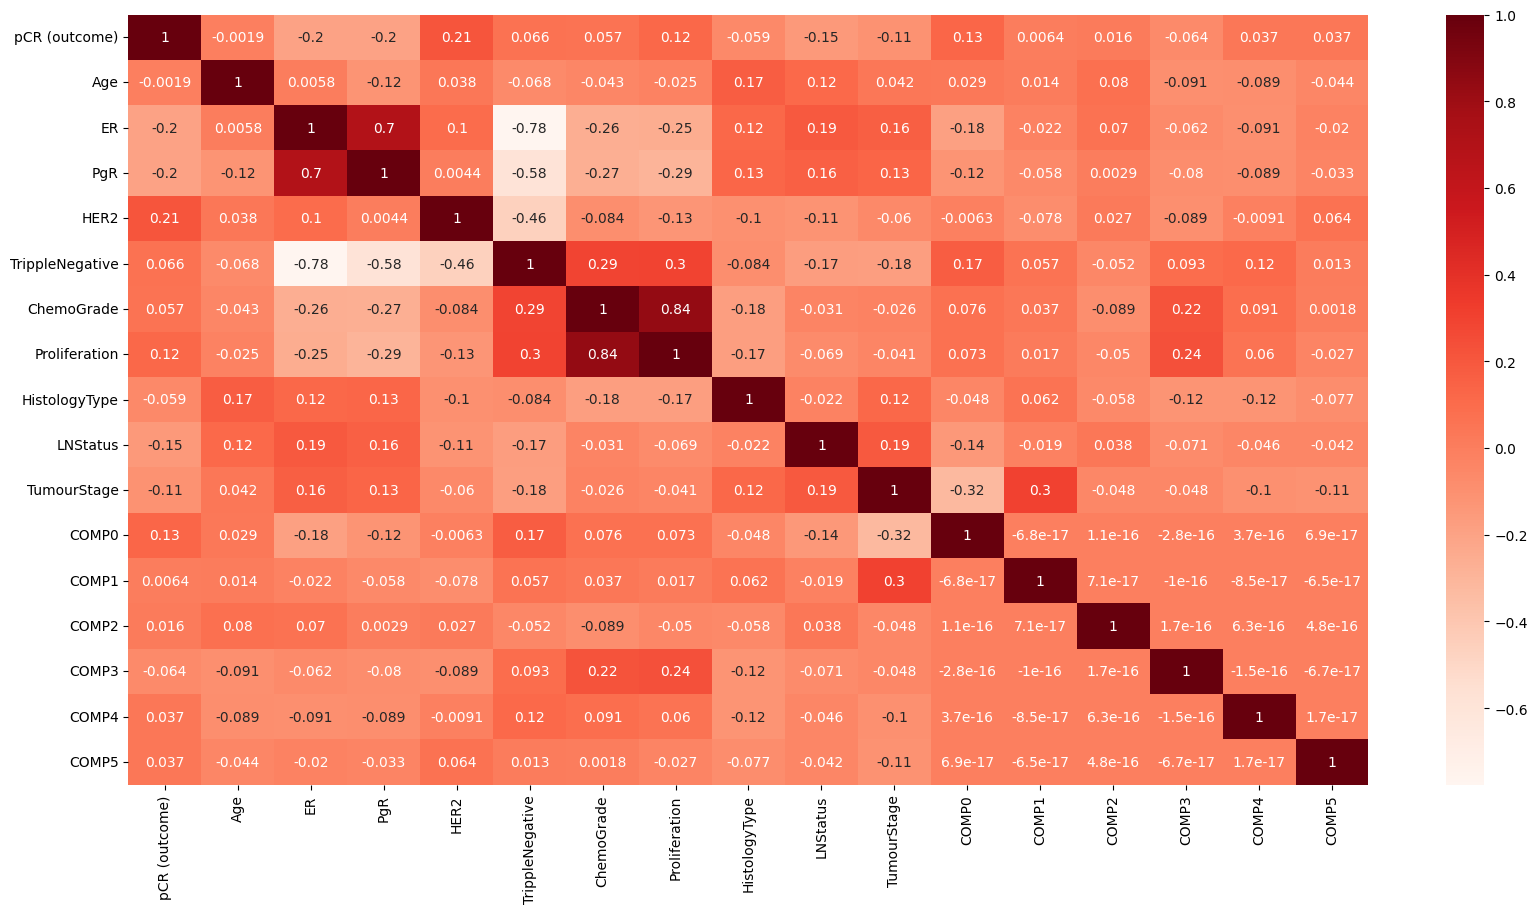

In [33]:
# Correlation matrix between the features.

cor=Df_afterPCA.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True ,cmap='Reds')
plt.show()

In [34]:
# Proliferation dropped due to high correlation with other feature

Df_afterPCA = Df_afterPCA.drop(columns=['Proliferation'])

In [35]:
X = Df_afterPCA.drop("pCR (outcome)", axis = 1)
Y = Df_afterPCA[["pCR (outcome)"]]

In [36]:
# Before looking into oversampling we need to split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234, stratify = Y)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
print(y_train.value_counts())
print(y_test.value_counts())

pCR (outcome)
0                221
1                 59
Name: count, dtype: int64
pCR (outcome)
0                95
1                25
Name: count, dtype: int64


### Data Oversampling

**Our data is not balanced. We have very less instances of pCR =1.**

#### SMOTEEEN
In order to balance the data we are first using a hybrid data augumentation technique called SMOTEEEN (SMOTE + ENN)
SMOTE (Synthetic Minority Oversampling Technique), ENN (Ensemble Neural Networks)

In [38]:
# from imblearn.combine import SMOTEENN

In [39]:
# from collections import Counter

In [40]:
# counter = Y.value_counts()
# print ('Before', counter)
# # oversampling the train dataset using SMOTE + ENN
# smenn = SMOTEENN()
# X_smenn, Y_smenn = smenn.fit_resample(X_train, y_train)
# counter = Y_smenn.value_counts()
# print ('After',counter)

**Adaptive Synthetic Sampling Approach**

In [41]:
from imblearn.over_sampling import ADASYN

In [42]:
counter = y_train.value_counts()
print ('Before', counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130, sampling_strategy='auto')
X_ada, Y_ada = ada.fit_resample(X_train, y_train)
counter = Y_ada.value_counts()
print ('After', counter)

Before pCR (outcome)
0                221
1                 59
Name: count, dtype: int64
After pCR (outcome)
1                231
0                221
Name: count, dtype: int64


In [43]:
X_train = X_ada
y_train = Y_ada

#### Random OverSampling

In [44]:
# from imblearn.over_sampling import RandomOverSampler

In [45]:
# rndm_sampler = RandomOverSampler(sampling_strategy='minority')

In [46]:
# X_over, y_over = rndm_sampler.fit_resample(X_train, y_train)

In [47]:
# print(y_train.value_counts())
# print(y_over.value_counts())

In [48]:
# X_train = X_over
# y_train = y_over

The best results were achieved through Adaptive Synthetic Sampling Approach

## Modelling

### Simple ANN

In [102]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [244]:
# Define a neural network model
act_func = tf.keras.layers.LeakyReLU(alpha=0.1)
model = Sequential([
    Dense(18, activation=act_func, input_shape=(15,)),
    Dense(22, activation=act_func),
    Dense(12, activation=act_func),
    Dense(6, activation=act_func),
    Dense(2, activation='softmax')
])


In [245]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [246]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 18)                288       
                                                                 
 dense_108 (Dense)           (None, 22)                418       
                                                                 
 dense_109 (Dense)           (None, 12)                276       
                                                                 
 dense_110 (Dense)           (None, 6)                 78        
                                                                 
 dense_111 (Dense)           (None, 2)                 14        
                                                                 
Total params: 1,074
Trainable params: 1,074
Non-trainable params: 0
_________________________________________________________________


In [247]:
# Train the model using PCA-transformed data
traning = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

In [248]:
# Making predictions on test data
y_pred = model.predict(X_test)
# y_pred = np.round(y_pred).flatten()  # Round predictions for binary classification

4/4 [==============================] - 0s 2ms/step


In [249]:
# since softmax outpust probabilities, we take  
y_pred = [int(np.argmax(x)) for x in y_pred]
print(y_pred)

[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [250]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [251]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.725


In [252]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        95
           1       0.33      0.32      0.33        25

    accuracy                           0.73       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.72      0.72      0.72       120

[[79 16]
 [17  8]]


In [253]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.5757894736842105


In [254]:
# import joblib
# joblib.dump(model, 'DeepLrng_0.57Bal_0.72Acc_0Imbalance.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense\activation
......vars
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-12-17 22:08:39         3747
metadata.json                                  2023-12-17 22:08:39  

['DeepLrng_0.57Bal_0.72Acc_0Imbalance.pkl']

In [255]:
# balAcc_deepL = balanced_accuracy_score(y_test, y_pred)

### XGBoost

In [256]:
from xgboost import XGBClassifier
import matplotlib.pyplot as pyplot

In [257]:
evalset = [(X_train, y_train), (X_test, y_test)]

In [272]:
model = XGBClassifier(min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, booster='gbtree')

In [273]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.67661	validation_1-logloss:0.70328
[1]	validation_0-logloss:0.65521	validation_1-logloss:0.69531
[2]	validation_0-logloss:0.63482	validation_1-logloss:0.69321
[3]	validation_0-logloss:0.61969	validation_1-logloss:0.68630
[4]	validation_0-logloss:0.59719	validation_1-logloss:0.67694
[5]	validation_0-logloss:0.57770	validation_1-logloss:0.66516
[6]	validation_0-logloss:0.55879	validation_1-logloss:0.65911
[7]	validation_0-logloss:0.54115	validation_1-logloss:0.65018
[8]	validation_0-logloss:0.52642	validation_1-logloss:0.64157
[9]	validation_0-logloss:0.51256	validation_1-logloss:0.63656
[10]	validation_0-logloss:0.49827	validation_1-logloss:0.62891
[11]	validation_0-logloss:0.48187	validation_1-logloss:0.62065
[12]	validation_0-logloss:0.47075	validation_1-logloss:0.61621
[13]	validation_0-logloss:0.45760	validation_1-logloss:0.60950
[14]	validation_0-logloss:0.44531	validation_1-logloss:0.60429
[15]	validation_0-logloss:0.43407	validation_1-logloss:0.60269
[1

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[21]	validation_0-logloss:0.38236	validation_1-logloss:0.58428
[22]	validation_0-logloss:0.37297	validation_1-logloss:0.58231
[23]	validation_0-logloss:0.36465	validation_1-logloss:0.57750
[24]	validation_0-logloss:0.35681	validation_1-logloss:0.57194
[25]	validation_0-logloss:0.34760	validation_1-logloss:0.56954
[26]	validation_0-logloss:0.34147	validation_1-logloss:0.56553
[27]	validation_0-logloss:0.33414	validation_1-logloss:0.56233
[28]	validation_0-logloss:0.32687	validation_1-logloss:0.56031
[29]	validation_0-logloss:0.32007	validation_1-logloss:0.55773
[30]	validation_0-logloss:0.31395	validation_1-logloss:0.55747
[31]	validation_0-logloss:0.30720	validation_1-logloss:0.55553
[32]	validation_0-logloss:0.30214	validation_1-logloss:0.55556
[33]	validation_0-logloss:0.29754	validation_1-logloss:0.55539
[34]	validation_0-logloss:0.29113	validation_1-logloss:0.55743
[35]	validation_0-logloss:0.28578	validation_1-logloss:0.55632
[36]	validation_0-logloss:0.28070	validation_1-logloss:

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [274]:
results = model.evals_result()

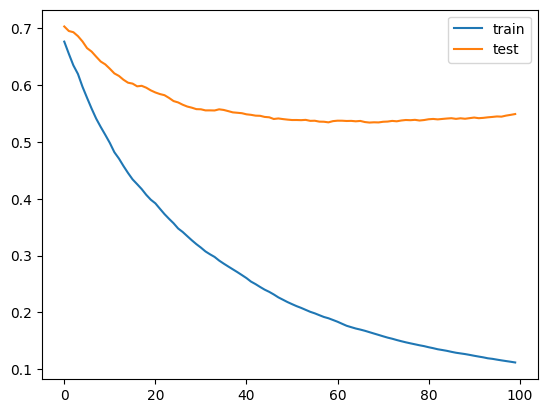

In [275]:
# plot learning curves

pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [276]:
y_pred = model.predict(X_test)
# since XGBoost outputs probabilities insted of binary values we have
# to round them to the nearest
y_pred = [round(value) for value in y_pred] 


In [277]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        95
           1       0.35      0.32      0.33        25

    accuracy                           0.73       120
   macro avg       0.59      0.58      0.58       120
weighted avg       0.73      0.73      0.73       120

[[80 15]
 [17  8]]


In [278]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.5810526315789474


In [279]:
# import joblib
# joblib.dump(model, 'XGBoost_0.73_0.58Bal_0Imbalance_final.pkl')

['XGBoost_0.73_0.58Bal_0Imbalance_final.pkl']

In [280]:
# balAcc_XGB = balanced_accuracy_score(y_test, y_pred)

In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, balanced_accuracy_score

In [ ]:
# bl_scorer = make_scorer(balanced_accuracy_score)

# clf = GridSearchCV(XGBClassifier(), {
#     'booster': ['gblinear', 'gbtree', 'dart'],
#     'max_depth': [5, 6, 7, 8, 9, 10]
# }, cv=3, return_train_score = False, scoring=bl_scorer)

# clf.fit(X_train, y_train)
# clf_results = pd.DataFrame(clf.cv_results_)
# clf_results

In [269]:
params = {
    'learning_rate' :[ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'max_depth'     :[3,4,5,6,8,10,12,15],
    'min_child_weight' :[1,3,5,7],
    'gamma'     : [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' :[0.3,0.4,0.5,0.7],
    'booster': ['gbtree', 'dart']
}

In [270]:
from sklearn.model_selection import RandomizedSearchCV
rmCV = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs =-1, cv=3, verbose=3)
rmCV.fit(X_train, y_train)
rmCV.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [271]:
rmCV.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.4,
 'booster': 'gbtree'}

### LightGBM

In [281]:
from lightgbm import LGBMClassifier

In [282]:
model = LGBMClassifier()

In [283]:
model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Info] Number of positive: 231, number of negative: 221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 452, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511062 -> initscore=0.044255
[LightGBM] [Info] Start training from score 0.044255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [284]:
y_pred = model.predict(X_test)
# since LightGBM outputs probabilities insted of binary values we have
# to round them to the nearest
y_pred = [round(value) for value in y_pred] 

In [285]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        95
           1       0.35      0.32      0.33        25

    accuracy                           0.73       120
   macro avg       0.59      0.58      0.58       120
weighted avg       0.73      0.73      0.73       120

[[80 15]
 [17  8]]


In [286]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.5810526315789474


In [287]:
# balAcc_LGBM = balanced_accuracy_score(y_test, y_pred)

### Logistic Regression

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [289]:
logReg = LogisticRegression(max_iter=500, tol=0.0001)
logReg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=500)

In [290]:
y_pred=logReg.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [291]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[77, 18],
       [18,  7]], dtype=int64)

In [292]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        95
           1       0.28      0.28      0.28        25

    accuracy                           0.70       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.70      0.70      0.70       120



In [293]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.5452631578947369


In [294]:
# balAcc_LogReg = balanced_accuracy_score(y_test, y_pred)

### SVC

In [295]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [308]:
model = SVC(kernel = 'rbf', gamma=0.1, C=1.0)
model.fit(X_train, y_train.values.ravel())

SVC(gamma=0.1)

In [309]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        95
           1       0.37      0.28      0.32        25

    accuracy                           0.75       120
   macro avg       0.60      0.58      0.58       120
weighted avg       0.73      0.75      0.74       120



In [310]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[83, 12],
       [18,  7]], dtype=int64)

In [311]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.5768421052631579


In [312]:
# clf = GridSearchCV(SVC(), {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1, 10, 50]
# }, cv=3, return_train_score = False)

# clf.fit(X_ada, Y_ada)
# clf_results = pd.DataFrame(clf.cv_results_)
# clf_results

In [313]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C':  np.logspace(-3, 2, 6),
    'gamma' : np.logspace(-3, 2, 6)
}

In [306]:
from sklearn.model_selection import RandomizedSearchCV
rmCV = RandomizedSearchCV(SVC(), param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs =-1, cv=3, verbose=3)
rmCV.fit(X_train, y_train)
rmCV.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma=0.1)

In [307]:
rmCV.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0}

In [314]:
# balAcc_SVC = balanced_accuracy_score(y_test, y_pred)

In [327]:
import math
acc_val = [balAcc_deepL, balAcc_LGBM, balAcc_LogReg, balAcc_SVC, balAcc_XGB]
rounded_acc_val = []

for var in acc_val:
    rounded_var = round(var, 3)
    rounded_acc_val.append(rounded_var)

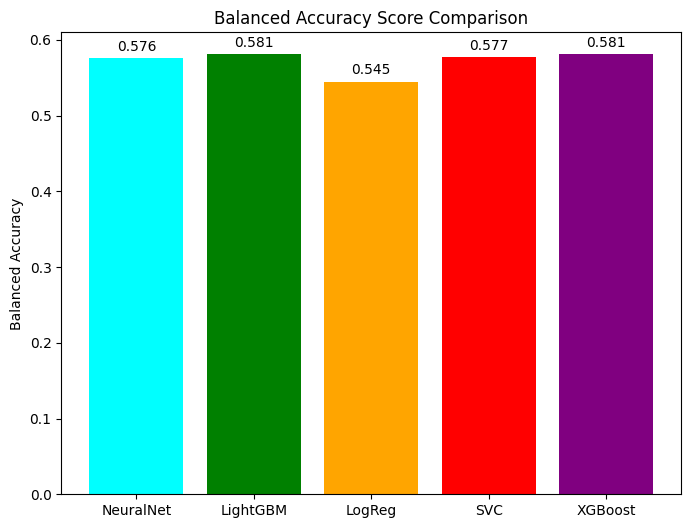

In [329]:
models = ['NeuralNet', 'LightGBM', 'LogReg', 'SVC', 'XGBoost']

# Define colors for each bar
colors = ['cyan', 'green', 'orange', 'red', 'purple']

# Create a figure and axis for bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar plot
bars = ax.bar(models, rounded_acc_val, color=colors)

# Add value labels to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Balanced Accuracy')
ax.set_title('Balanced Accuracy Score Comparison')

# Show the plot
plt.show()